<a href="https://colab.research.google.com/github/Bhuvana908/ML-Projects/blob/main/Regression%20on%20Weather%20Temperature%20Prediction/Weather_Temperature_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Temperature Prediction 🌡️📊

This notebook demonstrates a complete workflow for predicting **Temperature (C)** using historical weather data.  

---

## Steps Covered

### 1️⃣ Data Loading & Preprocessing
- Loaded dataset `weatherHistory.csv` and checked for missing values.  
- Filled missing `Precip Type` with mode and converted `Formatted Date` to datetime.  
- Extracted **year, month, day** from dates and dropped irrelevant columns (`Summary`, `Daily Summary`, `Loud Cover`).  
- Encoded categorical column `Precip Type` using `LabelEncoder`.  
- Removed duplicates and reset index.

### 2️⃣ Exploratory Data Analysis
- Visualized **correlation matrix** to understand relationships between features.  
- Selected top correlated features with target `Temperature (C)`.  
- Plotted **scatter plots** of selected features vs target.

### 3️⃣ Linear Regression with Gradient Descent
- Split data into **training** and **testing** sets.  
- Standardized features manually.  
- Implemented **Gradient Descent** to optimize parameters.  
- Monitored **MSE across epochs** to check convergence.

### 4️⃣ Linear Regression with Sklearn
- Built model using `LinearRegression()` from `sklearn`.  
- Compared parameters obtained with manual Gradient Descent.  
- Calculated **MSE** and **R²** scores for train and test sets.  
- Visualized predictions vs actual values.

### 5️⃣ Model Evaluation
- Compared **Gradient Descent** vs **Sklearn Linear Regression** performance.  
- Plotted **train MSE over epochs** along with Sklearn reference MSE.  
- Plotted **scatter plots of actual vs predicted temperatures** for test set.

### 6️⃣ Predicting New Data
- Predicted temperature for a **new input** (Apparent Temperature = 70, Visibility = 10).  
- Compared predictions from **Gradient Descent** and **Sklearn Linear Regression**.

---

### Key Learning Outcomes
✅ Understand **data preprocessing**, encoding, and feature selection in real-world datasets.  
✅ Implement **Gradient Descent** from scratch for linear regression.  
✅ Compare manual Gradient Descent with **Sklearn Linear Regression**.  
✅ Evaluate regression models using **MSE**, **R²**, and visualizations.  
✅ Predict new data points using trained regression models.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("weatherHistory.csv")
df.head()

Saving weatherHistory.csv to weatherHistory.csv


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
print(df.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [ ]:
df['Precip Type'].fillna(df['Precip Type'].mode()[0], inplace=True)
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)


df['Formatted Date'] = df['Formatted Date'].dt.date
df=df.drop_duplicates()

df.head()

/tmp/ipython-input-1216051988.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].fillna(df['Precip Type'].mode()[0], inplace=True)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df = df.reset_index(drop=True)


In [ ]:
df['year'] = pd.to_datetime(df['Formatted Date']).dt.year
df['month'] = pd.to_datetime(df['Formatted Date']).dt.month
df['day'] = pd.to_datetime(df['Formatted Date']).dt.day

In [ ]:
df=df.drop(columns=['Summary', 'Daily Summary', 'Formatted Date', 'Loud Cover'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Precip Type'] = le.fit_transform(df['Precip Type'])

In [ ]:
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1
3,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1
4,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1


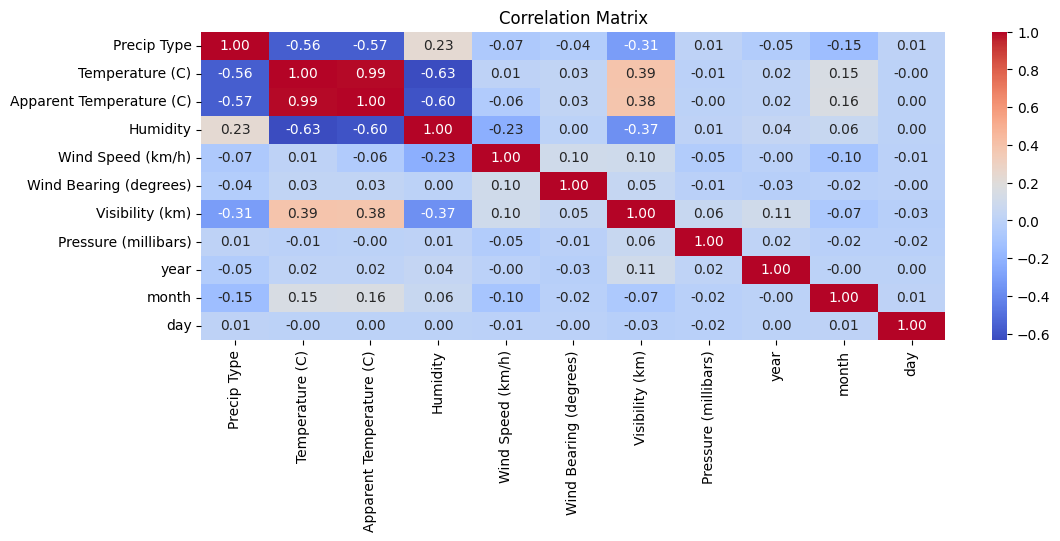

In [ ]:
plt.figure(figsize=(12, 4))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
target = 'Temperature (C)'
corr_target = corr[target].drop(target).sort_values(ascending=False)
print("\n🔹 Features correlated with target:")
print(corr_target)

features = corr_target.index[:2].tolist()
print(f"\n🎯 Selected features for prediction: {features}")


🔹 Features correlated with target:
Apparent Temperature (C)    0.992626
Visibility (km)             0.392944
month                       0.148506
Wind Bearing (degrees)      0.029897
year                        0.017547
Wind Speed (km/h)           0.009324
day                        -0.000304
Pressure (millibars)       -0.005471
Precip Type                -0.562670
Humidity                   -0.632333
Name: Temperature (C), dtype: float64

🎯 Selected features for prediction: ['Apparent Temperature (C)', 'Visibility (km)']


The strongest positive correlation with temperature is Apparent Temperature (0.99), indicating it’s the most influential predictor. Visibility and month show weak positive correlations, suggesting minor influence. Humidity (-0.63) and Precip Type (-0.56) have strong negative correlations, meaning higher humidity or precipitation is associated with lower temperatures. Other features have negligible impact on temperature prediction.

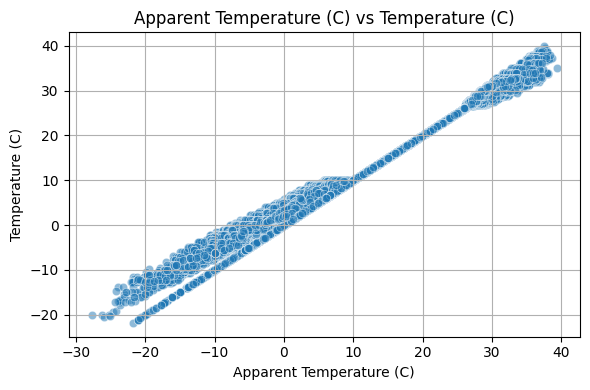

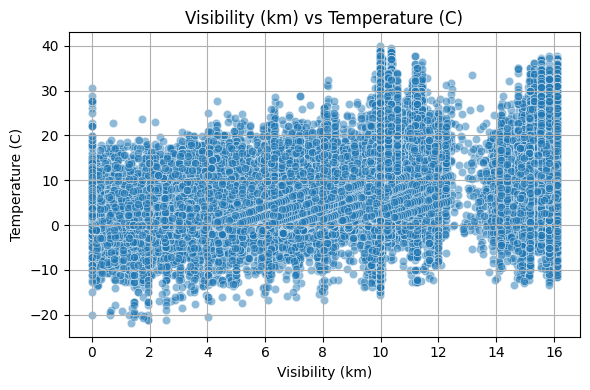

In [ ]:
for feat in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feat], y=df[target], alpha=0.5)
    plt.title(f"{feat} vs {target}")
    plt.xlabel(feat)
    plt.ylabel(target)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X = df[features].values
y = df[target].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)

X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std


X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]


alpha = 0.01
epochs = 1000
m = len(y_train)

theta = np.zeros((X_train_b.shape[1], 1))

mse_list = []

for epoch in range(epochs):
    y_pred_train = X_train_b.dot(theta)
    error = y_pred_train - y_train
    cost = (1/(2*m)) * np.sum(error**2)
    mse_list.append(cost)

    gradients = (1/m) * X_train_b.T.dot(error)
    theta -= alpha * gradients

print("\n✅ Final parameters from Gradient Descent:")
print(theta.flatten())


✅ Final parameters from Gradient Descent:
[11.93408551  9.40128737  0.16399076]


In [ ]:
y_pred_train_gd = X_train_b.dot(theta)
y_pred_test_gd = X_test_b.dot(theta)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_train_lr = lr.predict(X_train_scaled)
y_pred_test_lr = lr.predict(X_test_scaled)

theta_sklearn = np.vstack([lr.intercept_.reshape(-1,1), lr.coef_.T])
print("\n📌 Parameters from Sklearn Linear Regression:")
print(theta_sklearn.flatten())


📌 Parameters from Sklearn Linear Regression:
[11.93460074  9.41065053  0.15463628]


In [ ]:
mse_train_gd = mean_squared_error(y_train, y_pred_train_gd)
mse_test_gd = mean_squared_error(y_test, y_pred_test_gd)

r2_train_gd = r2_score(y_train, y_pred_train_gd)
r2_test_gd = r2_score(y_test, y_pred_test_gd)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)

r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

print(f"\n📉 Gradient Descent - Train MSE: {mse_train_gd:.4f}, Test MSE: {mse_test_gd:.4f}")
print(f"📉 Gradient Descent - Train R2: {r2_train_gd:.4f}, Test R2: {r2_test_gd:.4f}")

print(f"\n📉 Sklearn LR - Train MSE: {mse_train_lr:.4f}, Test MSE: {mse_test_lr:.4f}")
print(f"📉 Sklearn LR - Train R2: {r2_train_lr:.4f}, Test R2: {r2_test_lr:.4f}")


📉 Gradient Descent - Train MSE: 1.3193, Test MSE: 1.3211
📉 Gradient Descent - Train R2: 0.9855, Test R2: 0.9856

📉 Sklearn LR - Train MSE: 1.3191, Test MSE: 1.3210
📉 Sklearn LR - Train R2: 0.9855, Test R2: 0.9856


Both Gradient Descent and Sklearn Linear Regression deliver nearly identical performance, showing excellent fit and generalization with very low MSE and high R² values. This confirms that Gradient Descent successfully converged to the optimal solution found by Sklearn’s analytical method.


Sklearn Linear Regression Train MSE: 1.319148


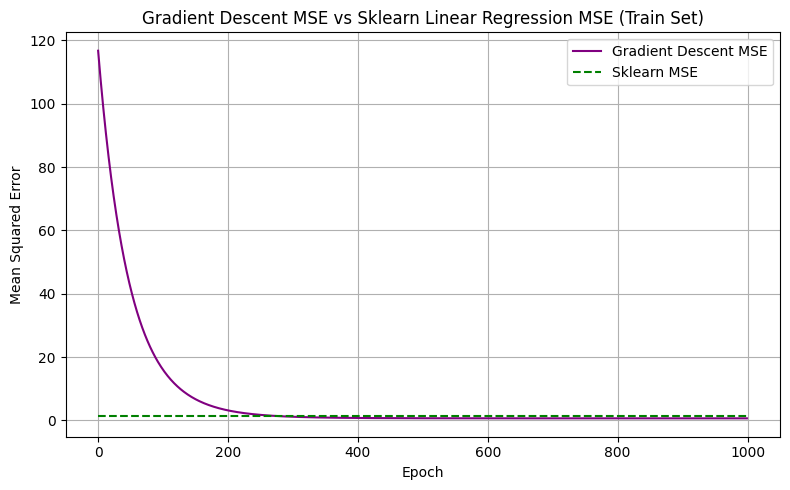

In [ ]:
from sklearn.metrics import mean_squared_error


mse_sklearn_train = mean_squared_error(y_train, y_pred_train_lr)
print(f"\nSklearn Linear Regression Train MSE: {mse_sklearn_train:.6f}")


plt.figure(figsize=(8,5))
plt.plot(range(epochs), mse_list, label='Gradient Descent MSE', color='purple')
plt.hlines(mse_sklearn_train, 0, epochs, colors='green', linestyles='dashed', label='Sklearn MSE')
plt.title("Gradient Descent MSE vs Sklearn Linear Regression MSE (Train Set)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The plot shows that the Gradient Descent MSE rapidly decreases and converges close to the Sklearn Linear Regression MSE after around 200 epochs. This indicates that the gradient descent algorithm successfully minimized the error and achieved performance comparable to the optimal sklearn solution.

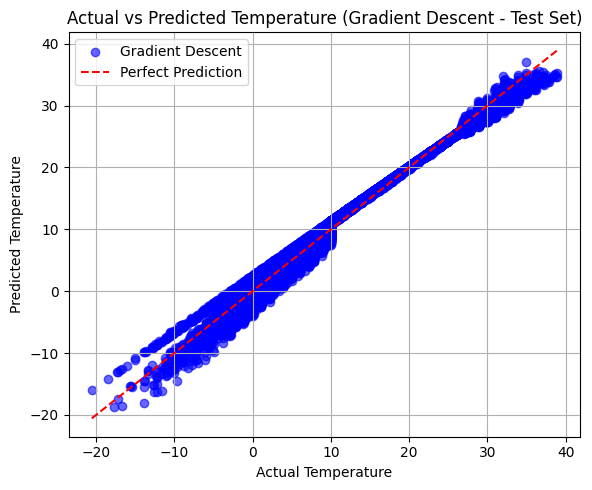

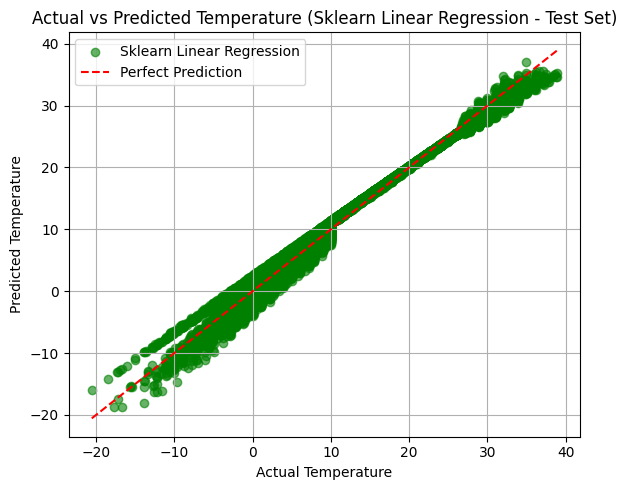

In [ ]:

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_test_gd, color='blue', alpha=0.6, label='Gradient Descent')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature (Gradient Descent - Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_test_lr, color='green', alpha=0.6, label='Sklearn Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature (Sklearn Linear Regression - Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Both models — Gradient Descent and Sklearn Linear Regression — show predictions that closely align with the perfect prediction line, indicating high accuracy. The Sklearn model exhibits slightly tighter clustering around the red line, suggesting marginally better performance and lower variance. Overall, Gradient Descent achieves results nearly identical to Sklearn’s optimized linear regression.

In [ ]:
new_input_raw = np.array([[70, 10]])
new_input_scaled = (new_input_raw - X_mean) / X_std


new_input_b = np.c_[np.ones((1,1)), new_input_scaled]


pred_gd = new_input_b.dot(theta)


pred_lr = lr.predict(new_input_scaled)

print(f"\n Prediction for new input: Apparent Temperature = {new_input_raw[0,0]}, Visibility = {new_input_raw[0,1]}")
print(f" Predicted Temperature (Gradient Descent): {pred_gd.flatten()[0]:.2f}")
print(f" Predicted Temperature (Sklearn Linear Regression): {pred_lr.flatten()[0]:.2f}")



 Prediction for new input: Apparent Temperature = 70, Visibility = 10
 Predicted Temperature (Gradient Descent): 63.95
 Predicted Temperature (Sklearn Linear Regression): 64.01
